In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
length = 0.5; # length of each segment
n = 35; # number of lanes ???
dt = 1 / 240; # time step
flow_speed = 85; # flow speed
alpha, betta = 0.3, 0.4; # consts
c_jam = 1; # jam density 140 - ???

In [99]:
n_time = int(input('Enter number of time steps: '))
n_sections = int(input('Enter number of sections: '))

Enter number of time steps: 6
Enter number of sections: 3


In [104]:
c = np.zeros( (n_time, n_sections) ) # average traffic density in [time][section]
v = np.zeros( (n_time, n_sections) ) # average speed of the vehicles [time][section]
q = np.zeros( (n_time, n_sections) ) # flow [time][section]   

In [105]:
q_in = 500
c_in = 0.2

In [106]:
for i in range(n_time):
    
    if i > 0:
        q_in = 1000 - q[i - 1][0]
        c_in = c[i - 1][n_sections - 1]
    
    v[i][0] = flow_speed * (1 - (c_in / c_jam)**alpha)**betta
    q[i][0] = c_in * v[i][0] * n
    c[i][0] = c_in + (dt / (n * length)) * (q_in - q[i][0])
    
    for j in range(1, n_sections):
        v[i][j] = flow_speed * (1 - (c[i][j - 1] / c_jam)**alpha)**betta
        q[i][j] = c[i][j - 1] * v[i][j] * n
        c[i][j] = c[i][j - 1] + (dt / (n * length)) * (q[i][j - 1] - q[i][j])

In [107]:
print(v)
print(q)
print(c)

[[57.90060151 56.66574265 57.13001767]
 [56.95469124 54.93328762 55.65282625]
 [55.39644229 54.32028487 54.69141616]
 [54.56366018 54.32971288 54.40965553]
 [54.38235377 54.4977501  54.45821568]
 [54.47176376 54.61903919 54.56835353]]
[[405.30421055 441.3769255  427.81960101]
 [432.94127485 491.62312911 470.84751759]
 [478.26918728 509.17037937 498.56558998]
 [502.22293735 508.90174879 506.62229949]
 [507.40110092 504.1070409  505.2362507 ]
 [504.84935934 500.63841862 502.08870107]]
[[0.22254662 0.21395787 0.21718581]
 [0.25569879 0.24172692 0.24667349]
 [0.26781386 0.26045643 0.26298138]
 [0.26762611 0.26603592 0.26657865]
 [0.26428721 0.26507151 0.26480265]
 [0.26188587 0.26288848 0.26254317]]


In [110]:
avg_v = [0] * n_sections
avg_q = [0] * n_sections
avg_c = [0] * n_sections
for i in range(n_time):
    for j in range(n_sections):
        avg_v[j] += v[i][j]
        avg_q[j] += q[i][j]
        avg_c[j] += c[i][j]

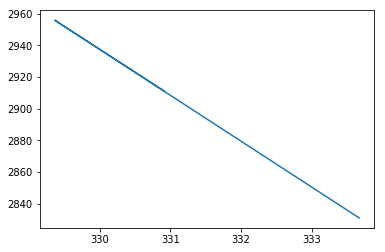

In [114]:
plt.plot(avg_v, avg_q)